<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/Timeseries_Analysis_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [0]:
# Import the data with pandas and using its Year column for the index
 mylynx_df = pd.read_csv("./LYNXdata.csv",header = 0,
                          names =[ 'year', 'trappings'],index_col = 0)

In [0]:
# Import the data with pandas and using its Year column for the index
 nottem_df = pd.read_csv("./nottem.csv",header = 0,
                          names =[ 'year', 'temp'],index_col = 0)

In [0]:
#Converting the Data frame into series onject
# New index generation with proper data indx and frequency

mylynxts = pd.Series(mylynx_df['trappings'].values, index = pd.date_range('1920-01-31',periods = 114, freq= 'A-DEC')) # Last day of monnth december
## Frequency options 'D'- days ,'B' - business days , 'H'- Hours ,'T/min','S'- seconds
nottemts = pd.Series(nottem_df['temp'].values, index = pd.date_range('1920-01-31',periods = 240, freq= 'M')) ## Monthly , 240 periods

In [13]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

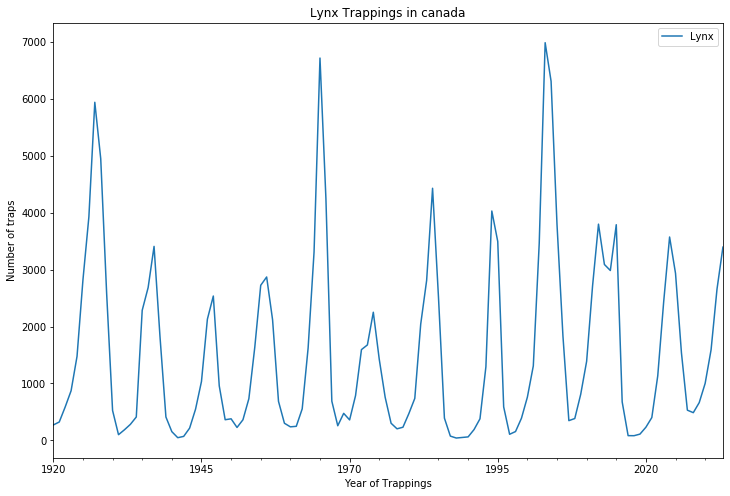

In [17]:
plt.figure(figsize=(12,8))
mylynxts.plot()
plt.title( 'Lynx Trappings in canada')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of traps')
plt.legend(['Lynx'])

In [19]:
# 2.shared axis plot
# Getting the cumulative total of myLyntxs
# The new Object inhertits the original index
cumsum_lynx = np.cumsum(mylynxts)
cumsum_lynx

1920-12-31       269
1921-12-31       590
1922-12-31      1175
1923-12-31      2046
1924-12-31      3521
               ...  
2029-12-31    166691
2030-12-31    167691
2031-12-31    169281
2032-12-31    171938
2033-12-31    175334
Freq: A-DEC, Length: 114, dtype: int64

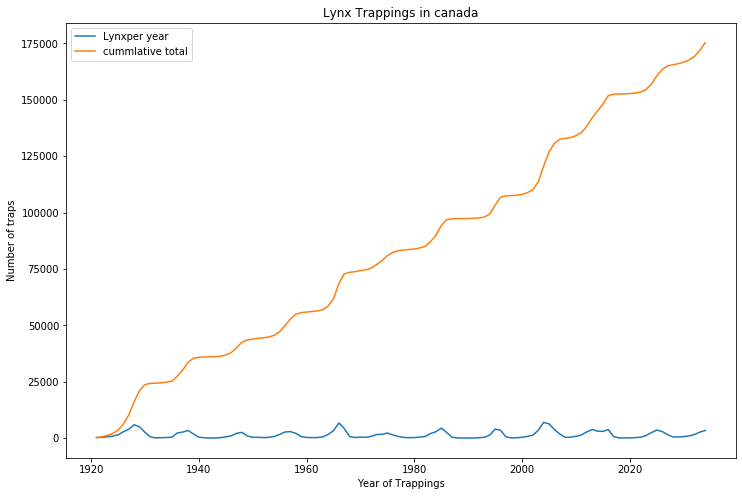

In [20]:
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(cumsum_lynx)
plt.title( 'Lynx Trappings in canada')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of traps')
plt.legend(['Lynxper year','cummlative total'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


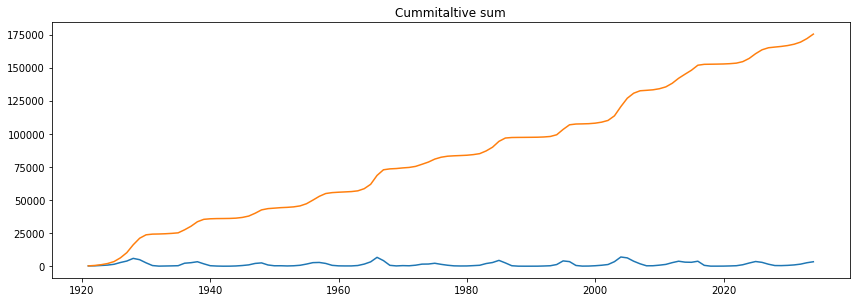

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(mylynxts)
plt.title( 'Lynx Trappings in canada')

plt.subplot(2,1,1)
plt.plot(cumsum_lynx)
plt.title( 'Cummitaltive sum')

plt.tight_layout()

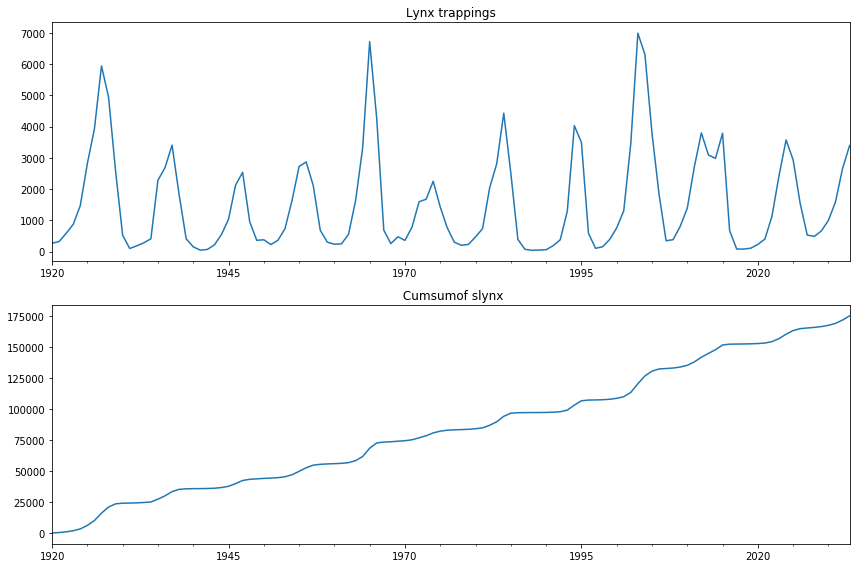

In [24]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,8))
mylynxts.plot(ax = ax1)
cumsum_lynx.plot( ax = ax2)
ax1.set_title("Lynx trappings")
ax2.set_title(" Cumsumof slynx")
plt.tight_layout()

In [0]:
#2. Stationarity Time series
# Have to be  equal Variance, Mean, Auto correlation
# Meam changes ovettime due to trend.
# Ensure diffence -stationarity by differencing the data set
# Unit root test for stationaity


## Test for Stationarity

def stationarity_test(timeseries):
    """ Augumented  Dickey Fuller test 
    """
   
    print("Results of Dickey fuller test")
    df_test = adfuller(timeseries,autolag = 'AIC')
    df_output = pd.Series(df_test[0:4], index = [ "test statistics", "P-value","Numner of lags used"," Number of observations used"])
    print(df_output)


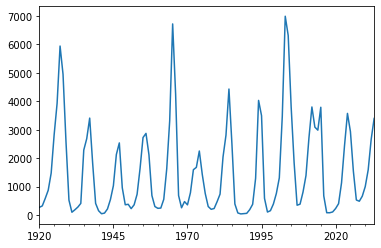

In [26]:
mylynxts.plot()

In [32]:
stationarity_test(mylynxts)

Results of Dickey fuller test
test statistics                  -2.996304
P-value                           0.035241
Numner of lags used               7.000000
 Number of observations used    106.000000
dtype: float64


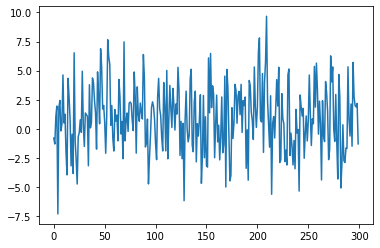

In [40]:
# Random normally disctrubted number
#Note the characterstics of stationatiyy data on the plot

plt.plot(np.random.normal(1,3,300))

In [39]:
stationarity_test(np.random.normal(1,3,300))

Results of Dickey fuller test
test statistics                -1.828730e+01
P-value                         2.301397e-30
Numner of lags used             0.000000e+00
 Number of observations used    2.990000e+02
dtype: float64


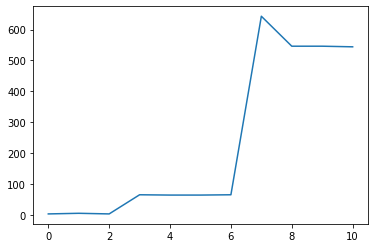

In [41]:
##Non- stationalrt example:

mydata = (3,5,3,65,64,64,65,643,546,546,544)
plt.plot(mydata)

In [42]:
stationarity_test(mydata)

Results of Dickey fuller test
test statistics                 42.200457
P-value                          1.000000
Numner of lags used              3.000000
 Number of observations used     7.000000
dtype: float64


In [0]:
## Auto correlation:--
# Infunce of previus Observations to recent Observations
# Step on timescale is called lag
# Trend an seasonlauty and indicator of Auto correlation

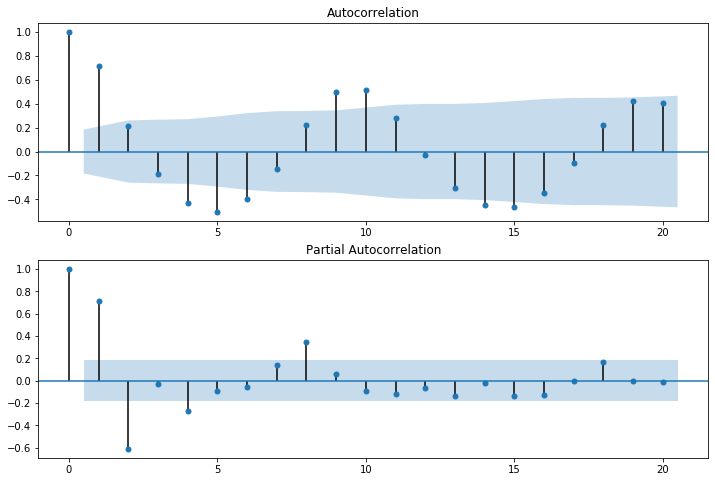

In [45]:
# Impolrting ACF and PACF plot fucntioms
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,8))
plot_acf(mylynxts,lags = 20 ,ax = ax1)
plot_pacf(mylynxts, lags = 20 , ax= ax2);

In [0]:
## Moving Averages and smootheres:
# Outliere might hinder the analysis
# smoother  show the middle ground in the data via decemating the high and lows
# Window: the number of succesive observations that are combined to find the smooth
# value for a time point
# 20 day , 30 day,50 day example
## SMAt = Yt + Yt-1+----+ Tt-n /n+1


In [0]:
def plot_rolling(timeseries,window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()

    fig = plt.figure(figsize= (12,8))
    og = plt.plot(timeseries, color = "blue", label = 'Original')
    mean = plt.plot(rol_mean, color = "red", label = 'Rolling mean ')
    std = plt.plot(rol_std, color = "black", label = 'Rolling std')
    plt.legend(loc = " best")
    plt.title(" rolling Mean and Stnadard Deviation(Window = "+str(window)+")")
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location ' best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


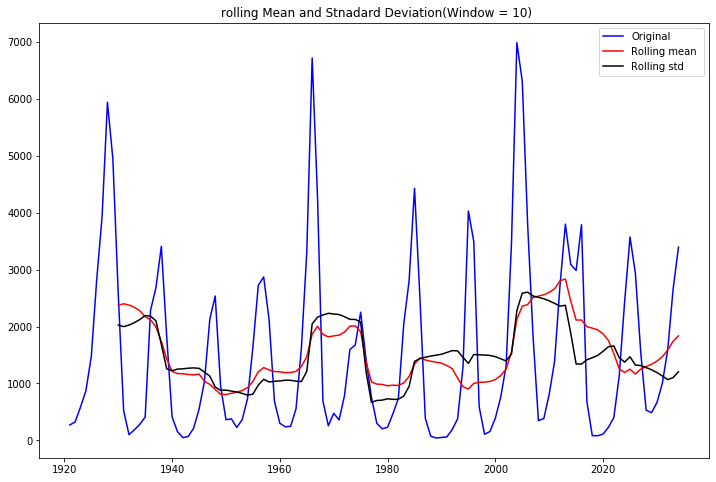

In [47]:
plot_rolling(mylynxts,10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location ' best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


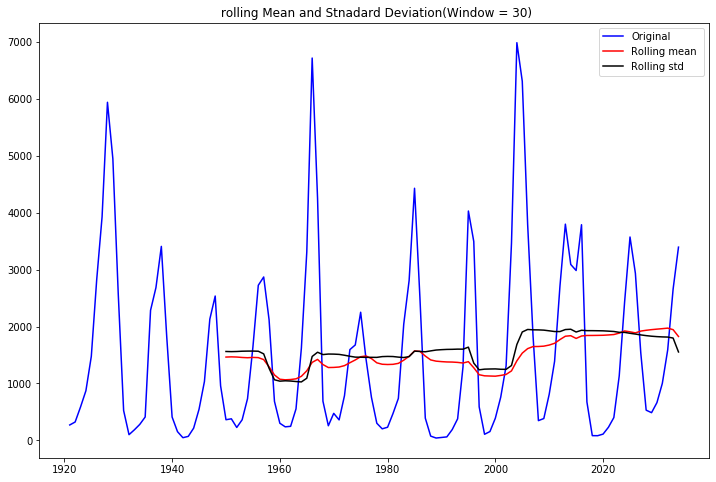

In [49]:
plot_rolling(mylynxts,30)

In [50]:
mylynxts.rolling(10).mean()

1920-12-31       NaN
1921-12-31       NaN
1922-12-31       NaN
1923-12-31       NaN
1924-12-31       NaN
               ...  
2029-12-31    1391.4
2030-12-31    1468.5
2031-12-31    1587.6
2032-12-31    1740.1
2033-12-31    1836.5
Freq: A-DEC, Length: 114, dtype: float64

In [0]:
## Exponential Wighted moving average
def plot_ewma(timeseries,alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()
    fig = plt.figure(figsize= (12,8))
    og_line = plt.plot(timeseries, color = "blue", label = 'Original')
    exwm_line = plt.plot(expw_ma, color = "red", label = 'EWMA ')
    plt.legend(loc = " best")
    plt.title(" EWMA(alpha = "+str(alpha)+")")
    plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location ' best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


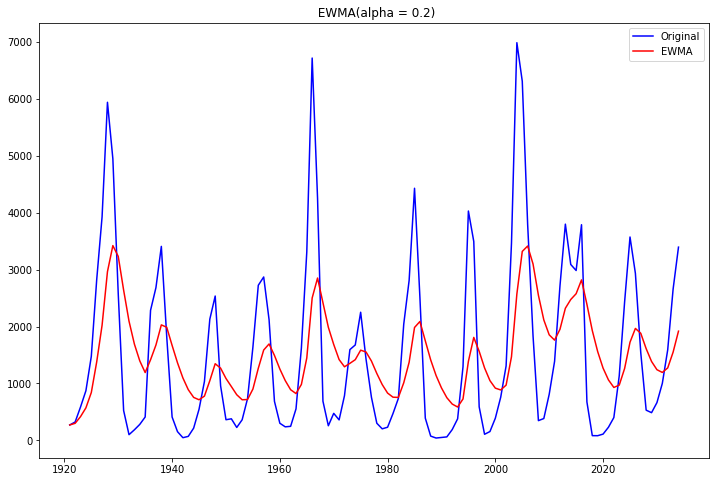

In [54]:
plot_ewma(mylynxts,0.2)